In [101]:
# Andrew Kim, Eric Park, Sitesh Arijit Mishra, Arjun Kolipaka
# CS 513 Final Project

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# Load data
df = pd.read_csv("kbopitchingdata.csv")

columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [104]:
# Summarize each column
df.describe()

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,4.207833,1.400588,762.609907,10.823529,6.309598,28.798762,1137.173065,1149.000000,596.346749,536.275542,106.715170,448.959752,0.500043
std,0.750075,0.115192,206.319423,12.022616,3.472626,9.402312,114.090785,177.545865,131.061590,127.222997,36.760506,83.547481,0.087081
min,2.540000,1.106000,175.000000,0.000000,0.000000,3.000000,692.000000,618.000000,257.000000,211.000000,38.000000,187.000000,0.188000
25%,3.630000,1.314000,639.000000,2.000000,4.000000,24.000000,1108.100000,1035.500000,506.000000,446.500000,78.000000,395.000000,0.444500
50%,4.220000,1.402000,793.000000,4.000000,6.000000,30.000000,1135.200000,1139.000000,582.000000,529.000000,101.000000,446.000000,0.504000
75%,4.700000,1.478000,911.500000,20.000000,8.500000,36.000000,1193.150000,1275.000000,694.500000,629.000000,132.500000,512.000000,0.561500
max,6.350000,1.761000,1194.000000,56.000000,19.000000,52.000000,1296.200000,1593.000000,927.000000,838.000000,194.000000,670.000000,0.706000


In [105]:
# Identify missing values
df.replace("?", np.nan, inplace = True)
missing_values = df.isna().sum()
print(missing_values)

ERA                    0
WHIP                   0
strikeouts             0
complete_game          0
shutouts               0
saves                  0
innings_pitched        0
hits                   0
runs                   0
earned_runs            0
home_runs              0
walks                  0
win_loss_percentage    0
dtype: int64


In [106]:
# Replace missing values with the mean of the column
quantitative_columns = df.select_dtypes(include = "number").columns
df[quantitative_columns] = df[quantitative_columns].fillna(df[quantitative_columns].mean())
df = df.round(2)

# Check that missing values are now gone
missing_values = df.isna().sum()
print(missing_values)

ERA                    0
WHIP                   0
strikeouts             0
complete_game          0
shutouts               0
saves                  0
innings_pitched        0
hits                   0
runs                   0
earned_runs            0
home_runs              0
walks                  0
win_loss_percentage    0
dtype: int64


In [107]:
freq_table = pd.crosstab(df['win_loss_percentage'], df['strikeouts'])
print(freq_table)

strikeouts           175   305   318   328   329   341   347   348   353   \
win_loss_percentage                                                         
0.19                    1     0     0     0     0     0     0     0     0   
0.23                    0     0     0     0     0     0     0     0     0   
0.26                    0     0     0     0     0     0     0     0     0   
0.29                    0     0     0     0     0     0     0     0     0   
0.30                    0     0     0     0     0     0     0     0     0   
0.32                    0     0     0     0     0     0     0     0     0   
0.33                    0     0     0     0     0     0     0     0     0   
0.34                    0     0     0     0     0     0     0     0     0   
0.35                    0     0     0     0     0     0     0     0     0   
0.36                    0     0     0     0     0     0     0     0     0   
0.37                    0     0     0     0     0     0     0     0     0   

array([[<Axes: xlabel='ERA', ylabel='ERA'>,
        <Axes: xlabel='WHIP', ylabel='ERA'>,
        <Axes: xlabel='strikeouts', ylabel='ERA'>,
        <Axes: xlabel='complete_game', ylabel='ERA'>,
        <Axes: xlabel='shutouts', ylabel='ERA'>,
        <Axes: xlabel='saves', ylabel='ERA'>,
        <Axes: xlabel='innings_pitched', ylabel='ERA'>,
        <Axes: xlabel='hits', ylabel='ERA'>,
        <Axes: xlabel='runs', ylabel='ERA'>,
        <Axes: xlabel='earned_runs', ylabel='ERA'>,
        <Axes: xlabel='home_runs', ylabel='ERA'>,
        <Axes: xlabel='walks', ylabel='ERA'>,
        <Axes: xlabel='win_loss_percentage', ylabel='ERA'>],
       [<Axes: xlabel='ERA', ylabel='WHIP'>,
        <Axes: xlabel='WHIP', ylabel='WHIP'>,
        <Axes: xlabel='strikeouts', ylabel='WHIP'>,
        <Axes: xlabel='complete_game', ylabel='WHIP'>,
        <Axes: xlabel='shutouts', ylabel='WHIP'>,
        <Axes: xlabel='saves', ylabel='WHIP'>,
        <Axes: xlabel='innings_pitched', ylabel='WHIP'>,
    

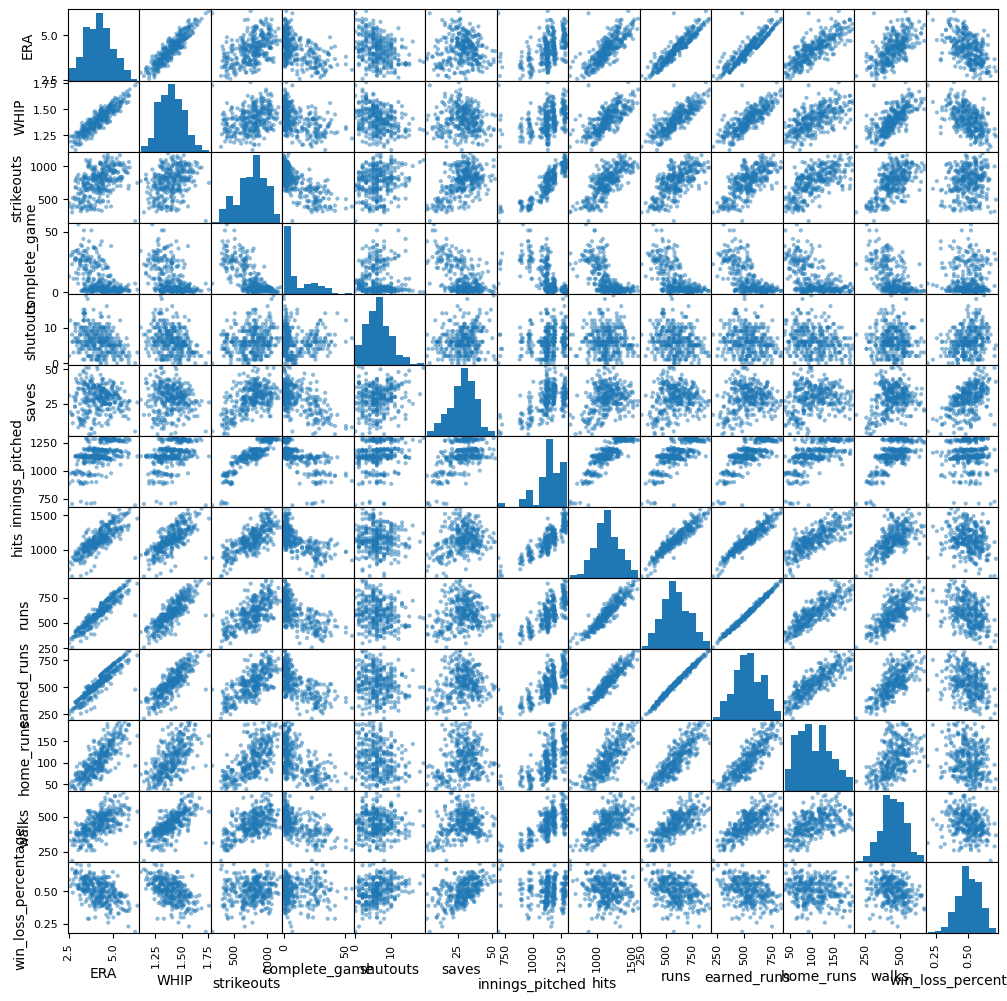

In [108]:
# Scatter plots from ERA to win_loss_percentage
pd.plotting.scatter_matrix(df.loc[:, 'ERA': 'win_loss_percentage'], figsize = (12, 12), diagonal = 'hist')

<Axes: >

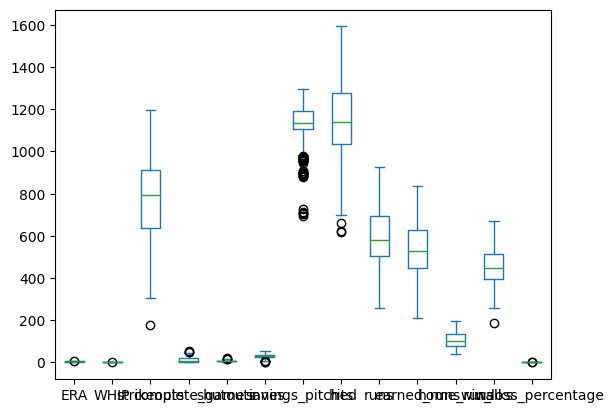

In [111]:
# Histograms from ERA to win_loss_percentage
df.loc[:, 'ERA':'win_loss_percentage'].plot(kind = 'box')

